### 정상 이파리와 질병 이파리 분류 신경망
1. 이미지 데이터 수집
2. 이미지 resize
3. 숫자 행렬로 전환
4. label 분리
5. one-hot encoding
6. 신경망 생성
7. 모델 학습
8. 사용자 인터페이스 생성

In [67]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout  # CNN, 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(777)

In [25]:
path = "C:/Data/leaf/train"
file_list = os.listdir(path)
print(file_list)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '107

In [29]:
# train data 256x256 -> 32x32 resize
os.mkdir('C:/Data/leaf/train_resize')

for f in file_list:
    img = cv2.imread(path+"/"+f)
    resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('C:/Data/leaf/train_resize/' + f, resize_img)

In [35]:
# test data resize
path = "C:/Data/leaf/test"
file_list = os.listdir(path)
os.mkdir('C:/Data/leaf/test_resize')

for f in file_list:
    img = cv2.imread(path+'/'+f)
    resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('C:/Data/leaf/test_resize/' + f, resize_img)

In [40]:
# 이미지를 숫자 데이터로 변환
import re

def image_load(path):
    file_list = os.listdir(path)
    file_name = []
    
    for f in file_list:
        name = int(re.sub('[^0-9]', '', f)) # i 가 숫자가 아니면 None
        file_name.append(name)
        
    file_name.sort()
    file_res = []
    
    # 디렉토리 + 파일명
    for i in file_name:
        file_res.append(path+'/'+str(i)+'.jpg')
    
    # 사진을 숫자로 변경
    image = []
    for j in file_res:
        img = cv2.imread(j)
        image.append(img)
    
    return np.array(image)

In [43]:
# 라벨 데이터 (정상 0, 질병 1)
# train: 정상 - 1 ~ 2000, 질병 - 2001 ~ 4000
train_label = 'C:/Data/leaf/train_label.csv'
file = open(train_label, 'w')

# train
for i in range(1, 2001):
    file.write(str(0) + '\n')
for i in range(2001, 4001):
    file.write(str(1) + '\n')

file.close()

test_label = 'C:/Data/leaf/test_label.csv'
file = open(test_label, 'w')
# test
for i in range(1, 51):
    file.write(str(0) + '\n')
for i in range(51, 101):
    file.write(str(1) + '\n')
file.close()

In [46]:
# one hot encoding function
import csv 

def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = []
    for label in label_data:
        label_list.append(label)
    label = np.array(label_list, dtype='int64')
    label = to_categorical(label)
    
    return label

label_load(train_label)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [63]:
# train / test data load

train_image = 'C:/Data/leaf/train_resize'
test_image = 'C:/Data/leaf/test_resize'
train_label = 'C:/Data/leaf/train_label.csv'
test_label = 'C:/Data/leaf/test_label.csv'

x_train = image_load(train_path)
x_test = image_load(test_path)
y_train = label_load(train_label)
y_test = label_load(test_label)

# 정규화
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape, x_test.shape) # 4 차원이어야 함

(4000, 32, 32, 3) (100, 32, 32, 3)


In [87]:
# 신경망 모델 구현
model = Sequential()
model.add(Conv2D(100, kernel_size=(5, 5), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Conv2D(10, kernel_size=(5, 5),  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# 5. 모델을 설정
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 

callbacks = [EarlyStopping(monitor='val_acc', patience=20, verbose=1, restore_best_weights=True)] # restore_best_weights : 가장 높은 성능일 때 가중치
history = model.fit(x_train, y_train, 
                    epochs = 200,  
                    batch_size = 100,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/200
40/40 [==============================] - 6s 144ms/step - loss: 0.5978 - acc: 0.7360 - val_loss: 0.7063 - val_acc: 0.5100
Epoch 2/200
40/40 [==============================] - 6s 145ms/step - loss: 0.3393 - acc: 0.8522 - val_loss: 0.6699 - val_acc: 0.5700
Epoch 3/200
40/40 [==============================] - 6s 144ms/step - loss: 0.2433 - acc: 0.9015 - val_loss: 0.9384 - val_acc: 0.5000
Epoch 4/200
40/40 [==============================] - 6s 145ms/step - loss: 0.1832 - acc: 0.9287 - val_loss: 0.8903 - val_acc: 0.5000
Epoch 5/200
40/40 [==============================] - 6s 145ms/step - loss: 0.1192 - acc: 0.9565 - val_loss: 1.2377 - val_acc: 0.5000
Epoch 6/200
40/40 [==============================] - 6s 145ms/step - loss: 0.0828 - acc: 0.9710 - val_loss: 1.0353 - val_acc: 0.5000
Epoch 7/200
40/40 [==============================] - 6s 144ms/step - loss: 0.0607 - acc: 0.9803 - val_loss: 1.0938 - val_acc: 0.5000
Epoch 8/200
40/40 [==============================] - 6s 146ms/step - 

In [72]:
model.save("C:/Data/leaf/leaf_model.h5")

In [88]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.5739 - acc: 0.8900


[0.5739351511001587, 0.8899999856948853]

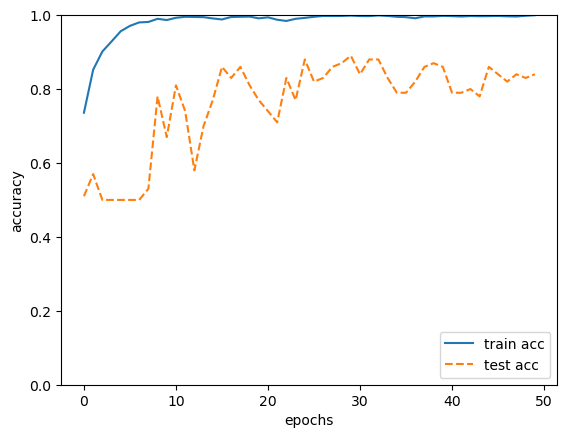

In [89]:
train_acc_list=history.history['acc']
test_acc_list=history.history['val_acc']

import matplotlib.pyplot as plt

x = np.arange(len(train_acc_list))
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()